In [25]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [26]:
movies = pd.read_csv("C:/Users/H P/Desktop/ANACONDA/ASSOCIATION/ASSIGNMENT/my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [27]:
y = movies.iloc[:,5:14]
y 

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart
0,1,0,1,1,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0
5,1,1,0,0,1,0,0,0,0
6,0,0,0,1,0,0,1,0,0
7,0,1,0,0,1,0,0,0,0
8,1,1,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,1,0


In [28]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(y, min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.5,"(Gladiator, Sixth Sense)"


In [29]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of     support                             itemsets
1       0.7                          (Gladiator)
0       0.6                        (Sixth Sense)
4       0.6                            (Patriot)
15      0.6                 (Gladiator, Patriot)
9       0.5             (Gladiator, Sixth Sense)
12      0.4               (Patriot, Sixth Sense)
23      0.4    (Gladiator, Patriot, Sixth Sense)
3       0.2                      (Harry Potter1)
19      0.2                       (LOTR1, LOTR2)
2       0.2                              (LOTR1)
5       0.2                              (LOTR2)
28      0.1     (Gladiator, Patriot, Braveheart)
27      0.1  (Harry Potter1, Sixth Sense, LOTR2)
26      0.1          (Sixth Sense, LOTR1, LOTR2)
25      0.1  (Harry Potter1, Sixth Sense, LOTR1)
24      0.1       (Gladiator, Sixth Sense, LOTR)
22      0.1                (Patriot, Braveheart)
21      0.1       (Harry Potter2, Harry Potter1)
20      0.1               (Har

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
61,(LOTR2),"(Harry Potter1, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
45,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
32,"(Sixth Sense, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
30,"(Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
29,(LOTR2),"(Sixth Sense, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
28,(LOTR1),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
27,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
26,"(Sixth Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
25,(LOTR2),"(Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
23,(Harry Potter1),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


C:\Users\H P\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


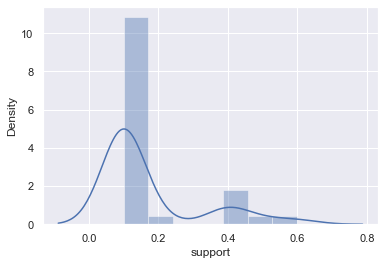

In [31]:
sns.set_theme(); np.random.seed(0)
x = rules.support
ax = sns.distplot(x)